 
  <img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" 
     style="float: right; margin-right: 30px;" 
     width="120"
     />

 ---
 
 # **OPTIMIZACIÓN: TAREA 3**
 EZAU FARIDH TORRES TORRES.
     
<p align="right"> Maestría en Ciencias con Orientación en Matemáticas Aplicadas. </p>
<p align="right"> CENTRO DE INVESTIGACIÓN EN MATEMÁTICAS. </p>

---

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "dark")

---

# **1.- Ejercicio 1:**

---

Programe el Algoritmo 3 de la Clase 6  de descenso máximo con backtracking
para calcular el tamaño de paso $\alpha_k$ de manera inexacta.

## **1.1.**

Programar la función que implementa el algoritmo de backtracking 
   (Algoritmo 2 de la Clase 6) que usa la condición de descenso suficiente
   (condición de Armijo) para seleccionar el tamaño de paso.
   La función recibe como entrada:
- el valor inicial $\alpha_{ini}$,
- el valor $\rho \in (0,1)$,
- la constante $c_1 \in (0,1)$ para la condición de Armijo,
- el punto $\mathbf{x}_k$,
- la función $f$,
- el valor $f_k = f(\mathbf{x}_k)$,
- el valor del gradiente  en el punto $\mathbf{x}_k$, $\nabla f_k$,
- la dirección de descenso $\mathbf{p}_k$, y
- el número máximo de iteraciones $N_b$.

La función devuelve
- el tamaño de paso $\alpha_k$,
- el número $i_{k}$ de iteraciones realizadas por el algoritmo de backtracking

In [2]:
def BACKTRAKING(alpha_init: float, p: float, c: float, 
                xk: np.array, f, fxk: np.array,
                gradfxk: np.array, pk: np.array, Nb: int):
    alpha = alpha_init
    for i in range(Nb):
        if f(xk + alpha*pk) <= fxk + c*alpha*(gradfxk.T)@pk:
            return alpha, i
        alpha = p*alpha
    return alpha, Nb

## **1.2.**

Programar la función que implementa el algoritmo de descenso máximo con
   backtracking. Ésta recibe como entrada:
- La función $f(\mathbf{x})$, 
- el gradiente $\nabla f(\mathbf{x})$ de la función $f$, 
- un punto inicial $\mathbf{x}_{0}$, 
- las tolerancia $\tau>0$, 
- el número máximo de iteraciones $N$ para el algoritmo de descenso máximo, 
- el valor inicial $\alpha_{ini}$,
- el valor $\rho \in (0,1)$,
- la constante $c_1 \in (0,1)$ para la condición de Armijo y
- el número máximo de iteraciones $N_{gs}$ para el método de la sección dorada.

La función devuelve 
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\alpha_k \mathbf{p}_{k}\| < \tau$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.
- Si $n\ne 2$, devuelve un arreglo vació. En caso contrario, devuelve un 
  arreglo que contiene las componentes de los puntos de la secuencia, el
  tamaño de paso y la cantidad de iteraciones que hizo el algoritmo 
  de backtracking en cada iteración:
  
$$ \begin{array}{llll}
x^{(0)}_1 & x^{(0)}_2 & \alpha_0 & i_0 \\
x^{(1)}_1 & x^{(1)}_2 & \alpha_0 & i_1 \\
\vdots &  \vdots &  \vdots &  \vdots \\
x^{(k)}_1 & x^{(k)}_2 & \alpha_k & i_k \\
\end{array} $$

In [3]:
def DESC_MAX_BACKTRACKING(f, gradf, x0: np.array, tol: float,
                        max_iter: int, alpha_init: float,
                        p: float, c: float, Nb: int):
    xk = x0
    hist = np.empty((0, 4))
    ind = False
    for k in range(max_iter):
        gk = gradf(xk)
        pk = -gk
        ak, k1 = BACKTRAKING(alpha_init, p, c, xk, f, f(xk), gk, pk, Nb)
        if ak*np.linalg.norm(pk) < tol:
            ind = True
            return xk, k, ind, hist
        xk = xk + ak*pk
        if len(x0)==2:
            hist = np.vstack((hist, [[xk[0], xk[1], ak, k1]]))
    return xk, k, ind, hist

## **1.3.**

Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente 
de manera analítica y programe la función correspondiente. Use cada punto 
$\mathbf{x}_0$ como punto inicial del algoritmo.  

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
$$ \mathbf{x}_0 = (2.,4.) $$
$$ \mathbf{x}_0 = (0.,0.) $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
$$ \mathbf{x}_0 = (-2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0) $$
$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

En la página [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization)
pueden ver las gráficas de estas funciones y sus mínimos locales.

Use 
- la  tolerancia $\tau = \sqrt{n}\epsilon_m^{1/2}$, donde $\epsilon_m$ 
  es el épsilon de la máquina, 
- $\alpha_{ini} = 1.0$,
- $\rho = 0.8$,
- $c_1 = 0.1$,
- el número de iteraciones máximas $N=30000$ para el descenso máximo 
- el número de iteraciones máximas $N_{b}=600$ para el método de backtracking.

En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
Además, si $n=2$, imprima
- El valor promedio de los tamaños de paso $\alpha_0, \alpha_1, ..., \alpha_k$.
- El valor promedio de las iteraciones $i_0, i_1, ..., i_k$ realizadas por el algoritmo de backtracking.
- La gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.


In [4]:
def f_Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_Himmelblau(x):
    x1 = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    x2 = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([x1,x2], dtype = float)

def f_Beale(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

def grad_Beale(x):
    x1 = 2*(x[1] - 1)*(1.5 - x[0] + x[0]*x[1]) + 2*(x[1]**2 - 1)*(2.25 - x[0] + x[0]*x[1]**2) + 2*(x[1]**3 - 1)*(2.625 - x[0] + x[0]*x[1]**3)
    x2 = 2*x[0]*(1.5 - x[0] + x[0]*x[1]) + 4*x[0]*x[1]*(2.25 - x[0] + x[0]*x[1]**2) + 6*x[0]*(x[1]**2)*(2.625 - x[0] + x[0]*x[1]**3)
    return np.array([x1,x2], dtype = float)

def f_Rosenbrock(x):
    n = len(x)
    s = 0
    for i in range(n-1):
        s = s + 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return s

def grad_Rosenbrock(x):
    n = len(x)
    grad = np.zeros(n)
    grad[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1-x[0])
    grad[n-1] = 200*(x[n-1] - x[n-2]**2)
    for j in range(1,n-1):
        grad[j] = 200*(x[j]-x[j-1]**2) - 400*x[j]*(x[j+1] - x[j]**2) - 2*(1-x[j])
    return np.array(grad, dtype = float)

def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels,
                    secuencia1=None, secuencia2=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = mX.copy()
    for i,y in enumerate(ay):
        for j,x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x,y]))
    
    fig, ax = plt.subplots(figsize=(8, 5))
    CS = ax.contour(mX, mY, mZ, levels, cmap='brg')
    if secuencia1 is not None:
        puntos1 = np.array(secuencia1)
        ax.plot(puntos1[:,0], puntos1[:,1],
                    color='#FF0000', label='Trayectoria 1')
    if secuencia2 is not None:
        puntos2 = np.array(secuencia2)
        ax.plot(puntos2[:,0], puntos2[:,1],
                    color='#000000', label='Trayectoria 2')
    ax.plot()
    ax.grid(True)
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel('Nivel')
    return ax

>Los gradientes ya fueron calculados de forma analítica en la tarea pasada, a continuación se cargan los parámetros que serán aplicados a la mayoría de los ejemplos para no cargarlos cada vez:

In [5]:
eps = np.finfo(float).eps
alpha_init = 1.0
tol = np.sqrt(2)*eps**(1/2)
rho = 0.8
c1 = 0.1
N = 30000
Nb = 600

### **Función de Himmelblau con $\mathbf{x}_0 = (2.,4.)$ y $\mathbf{x}_0 = (0.,0.):$** 

--------- x0 = (2., 4.) ---------
ITERACIONES: 29
xk:          [2.99999999 1.99999999]
f(xk):       7.84550082956209e-15
||f(xk)||:   1.1100948506376434e-06
INDICADORA:  True
PROMEDIOS
alpha's:     0.018829705338574945
ITER BACKT:  17.82758620689655

--------- x0 = (0., 0.) ---------
ITERACIONES: 32
xk:          [2.99999999 1.99999999]
f(xk):       7.151770384664323e-15
||f(xk)||:   1.0439488209969912e-06
INDICADORA:  True
PROMEDIOS
alpha's:     0.023742822844307888
ITER BACKT:  17.46875


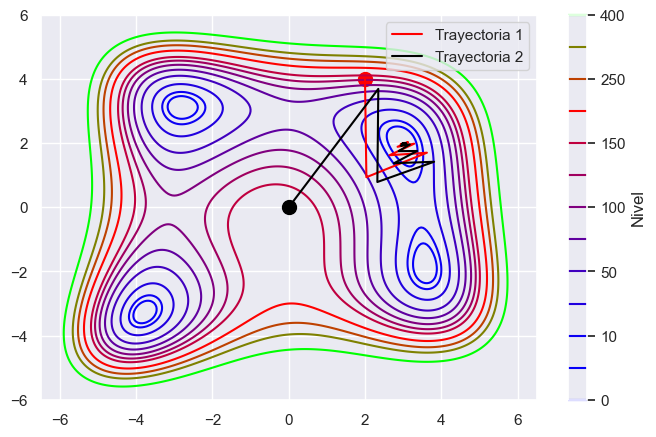

In [6]:
print('--------- x0 = (2., 4.) ---------')
x01 = np.array([2.,4.], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING(f=f_Himmelblau,
                    gradf=grad_Himmelblau, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Himmelblau(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Himmelblau(xk1)))
print("INDICADORA: ", ind1)
print("PROMEDIOS")
print("alpha's:    ", hist1[:,2].mean())
print("ITER BACKT: ", hist1[:,3].mean())

print('\n--------- x0 = (0., 0.) ---------')
x02 = np.array([0.,0.], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING(f=f_Himmelblau,
                    gradf=grad_Himmelblau, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Himmelblau(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Himmelblau(xk2)))
print("INDICADORA: ", ind2)
print("PROMEDIOS")
print("alpha's:    ", hist2[:,2].mean())
print("ITER BACKT: ", hist2[:,3].mean())

#Grafica
road1 = np.insert(hist1[:,0:2], 0, x01, axis=0)
road2 = np.insert(hist2[:,0:2], 0, x02, axis=0)
ax = contornosFnc2D(f_Himmelblau, xleft=-6.5, xright=6.5, ybottom=-6, ytop=6,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 400],
            secuencia1 = road1, secuencia2 = road2)
ax.scatter(2,4, s = 100, c = '#FF0000')
ax.scatter(0,0, s = 100, c = '#000000')
plt.legend()
plt.show()

### **Función de Beale con $\mathbf{x}_0 = (2.,3.)$ y $\mathbf{x}_0 = (2.,4.):$**

--------- x0 = (2., 3.) ---------
ITERACIONES: 1011
xk:          [2.99999928 0.49999983]
f(xk):       8.528428776110023e-14
||f(xk)||:   4.6672072123271416e-07
INDICADORA:  True
PROMEDIOS
alpha's:     0.042827526379699964
ITER BACKT:  14.193867457962414

--------- x0 = (2., 4.) ---------


ITERACIONES: 16864
xk:          [3.00000074 0.50000019]
f(xk):       8.885549121039353e-14
||f(xk)||:   4.7076081039167363e-07
INDICADORA:  True
PROMEDIOS
alpha's:     0.006948639908393295
ITER BACKT:  24.097604364326376


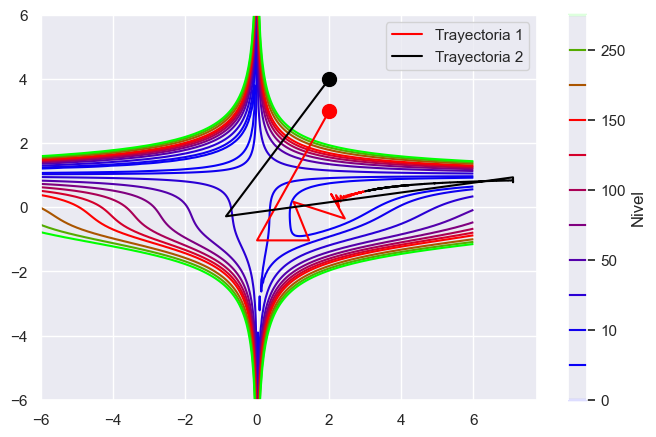

In [7]:
print('--------- x0 = (2., 3.) ---------')
x01 = np.array([2.,3.], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING(f=f_Beale,
                    gradf=grad_Beale, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Beale(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Beale(xk1)))
print("INDICADORA: ", ind1)
print("PROMEDIOS")
print("alpha's:    ", hist1[:,2].mean())
print("ITER BACKT: ", hist1[:,3].mean())

print('\n--------- x0 = (2., 4.) ---------')
x02 = np.array([2.,4.], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING(f=f_Beale,
                    gradf=grad_Beale, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Beale(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Beale(xk2)))
print("INDICADORA: ", ind2)
print("PROMEDIOS")
print("alpha's:    ", hist2[:,2].mean())
print("ITER BACKT: ", hist2[:,3].mean())

#Grafica
road1 = np.insert(hist1[:,0:2], 0, x01, axis=0)
road2 = np.insert(hist2[:,0:2], 0, x02, axis=0)
ax = contornosFnc2D(f_Beale, xleft=-6, xright=6, ybottom=-6, ytop=6,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1 = road1, secuencia2 = road2)
ax.scatter(2,3, s = 100, c = '#FF0000')
ax.scatter(2,4, s = 100, c = '#000000')
plt.legend()
plt.show()

### **Función de Rosenbrock con $\mathbf{x}_0 = (-2.1,4.5)$ y $\mathbf{x}_0 = (-1.2,1.0)$:**

--------- x0 = (-2.1, 4.5) ---------


ITERACIONES: 21730
xk:          [1.000006   1.00001204]
f(xk):       3.61526542723387e-11
||f(xk)||:   1.0852939980899932e-05
INDICADORA:  True
PROMEDIOS
alpha's:     0.0016287604010221937
ITER BACKT:  29.215002300966407

--------- x0 = (-1.2, 1.0) ---------
ITERACIONES: 11166
xk:          [1.00000613 1.00001231]
f(xk):       3.7820775522341363e-11
||f(xk)||:   1.0886691640011656e-05
INDICADORA:  True
PROMEDIOS
alpha's:     0.002036016920217295
ITER BACKT:  27.883306466057675


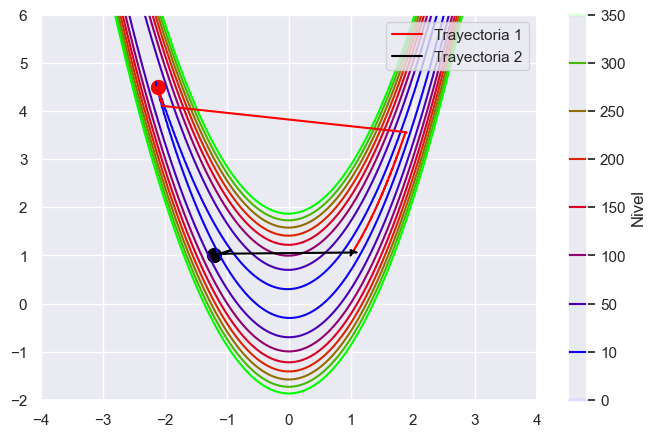

In [8]:
print('--------- x0 = (-2.1, 4.5) ---------')
x01 = np.array([-2.1, 4.5], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Rosenbrock(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk1)))
print("INDICADORA: ", ind1)
print("PROMEDIOS")
print("alpha's:    ", hist1[:,2].mean())
print("ITER BACKT: ", hist1[:,3].mean())

print('\n--------- x0 = (-1.2, 1.0) ---------')
x02 = np.array([-1.2, 1.0], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Rosenbrock(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk2)))
print("INDICADORA: ", ind2)
print("PROMEDIOS")
print("alpha's:    ", hist2[:,2].mean())
print("ITER BACKT: ", hist2[:,3].mean())

#Grafica
road1 = np.insert(hist1[:,0:2], 0, x01, axis=0)
road2 = np.insert(hist2[:,0:2], 0, x02, axis=0)
ax = contornosFnc2D(f_Rosenbrock, xleft=-4, xright=4, ybottom=-2, ytop=6,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = road1, secuencia2 = road2)
ax.scatter(-2.1, 4.5, s = 100, c = '#FF0000')
ax.scatter(-1.2, 1.0, s = 100, c = '#000000')
plt.legend()
plt.show()

### **Función de Rosenbrock con $\mathbf{x}_0 = (-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5)$ y** 

**$\mathbf{x}_0 = (-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0)$:**

In [9]:
tol = np.sqrt(10)*eps**(1/2)
print('--------- x0 = (-2.1, 4.5) ---------')
x01 = np.array([-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Rosenbrock(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk1)))
print("INDICADORA: ", ind1)

print('\n--------- x0 = (-1.2, 1.0) ---------')
x02 = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Rosenbrock(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk2)))
print("INDICADORA: ", ind2)

--------- x0 = (-2.1, 4.5) ---------
ITERACIONES: 17349
xk:          [0.99999994 0.99999986 0.99999975 0.99999947 0.99999896 0.99999789
 0.99999579 0.99999154 0.99998306 0.99996602]
f(xk):       3.8381660275388105e-10
||f(xk)||:   4.678684104582778e-05
INDICADORA:  True

--------- x0 = (-1.2, 1.0) ---------
ITERACIONES: 17684
xk:          [0.99999994 0.99999987 0.99999975 0.99999947 0.99999897 0.9999979
 0.99999582 0.9999916  0.99998317 0.99996624]
f(xk):       3.7861901813640893e-10
||f(xk)||:   3.803670508678177e-05
INDICADORA:  True


## **1.4.**

Nocedal sugiere que la constante $c_1$ sea del orden de $0.0001$. 
   Use $c_1=0.0001$ y  repeta la prueba con la función de Beale y 
   explique en qué casos conviene usar un valor grande o pequeño de $c_1$.

--------- x0 = (2., 3.) ---------
ITERACIONES: 29999
xk:          [-0.00964943  6.72131827]
f(xk):       5.500622340349736
||f(xk)||:   1.131711471932428
INDICADORA:  False
PROMEDIOS
alpha's:     1.6435986478438556e-05
ITER BACKT:  51.4287

--------- x0 = (2., 4.) ---------
ITERACIONES: 10823
xk:          [3.00000046 0.50000012]
f(xk):       3.605743478619451e-14
||f(xk)||:   10344.646640581139
INDICADORA:  True
PROMEDIOS
alpha's:     0.009393920188150726
ITER BACKT:  22.938279589762544


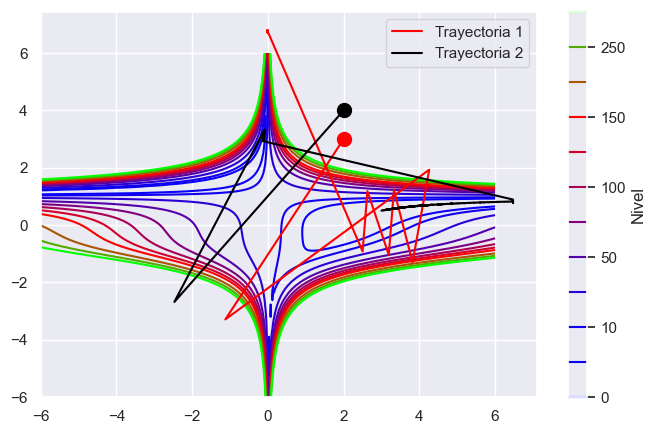

In [10]:
eps = np.finfo(float).eps
alpha_init = 1.0
tol = np.sqrt(2)*eps**(1/2)
rho = 0.8
c1 = 0.0001
N = 30000
Nb = 600

print('--------- x0 = (2., 3.) ---------')
x01 = np.array([2.,3.], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING(f=f_Beale,
                    gradf=grad_Beale, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Beale(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Beale(xk1)))
print("INDICADORA: ", ind1)
print("PROMEDIOS")
print("alpha's:    ", hist1[:,2].mean())
print("ITER BACKT: ", hist1[:,3].mean())

print('\n--------- x0 = (2., 4.) ---------')
x02 = np.array([2.,4.], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING(f=f_Beale,
                    gradf=grad_Beale, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Beale(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk2)))
print("INDICADORA: ", ind2)
print("PROMEDIOS")
print("alpha's:    ", hist2[:,2].mean())
print("ITER BACKT: ", hist2[:,3].mean())

#Grafica
road1 = np.insert(hist1[:,0:2], 0, x01, axis=0)
road2 = np.insert(hist2[:,0:2], 0, x02, axis=0)
ax = contornosFnc2D(f_Beale, xleft=-6, xright=6, ybottom=-6, ytop=6,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1 = road1, secuencia2 = road2)
ax.scatter(2,3, s = 100, c = '#FF0000')
ax.scatter(2,4, s = 100, c = '#000000')
plt.legend()
plt.show()

>**COMENTARIO:** En este caso, el rendimiento del algoritmo empeoró hasta el grado de que en el punto $(2,3)$ no hubo convergencia, alanzando las $30000$ iteraciones y en la imagen podemos notar que, al darle un $c$ tan pequeño, el factor tamaño de paso $x\alpha$ se vuelve mucho más fino, permitiendo más lugar a posibles perturbaciones dadas por el comportamiento de la función, como en el caso de la función Beale.

---

# **2.- Ejercicio 2:**

---

Reprograme el Algoritmo 3 de la Clase 6  de descenso máximo 
para calcular el tamaño de paso inicial del algoritmo de backtracking.

## **2.1.**

Modifique la función del Punto 2 del Ejercicio 1 de modo que en la iteración
   $k=0$ se invoque a la función que  ejecuta el backtracking usando el valor
   $\alpha_{ini}$ dado, es decir,
   
   $backtracking(f, \mathbf{x}_k, f_k, \nabla f_k, \mathbf{p}_k, \alpha_{ini}, \rho, c_1, N_b)$
   
   y para $k>0$ se calcule el valor inicial del tamaño de paso como
   
$$ \bar{\alpha} = \alpha_{k-1} \min\bigg\{100, \frac{\nabla f_{k-1}^\top \mathbf{p}_{k-1}}{\nabla f_{k}^\top \mathbf{p}_k} \bigg\} $$

   y se use este valor al ejercutar backtracking:
   $backtracking(f, \mathbf{x}_k, f_k, \nabla f_k, \mathbf{p}_k, \bar{\alpha}, \rho, c_1, N_b).$

In [11]:
def DESC_MAX_BACKTRACKING2(f, gradf, x0: np.array, tol: float,
                        max_iter: int, alpha_init: float,
                        p: float, c: float, Nb: int):
    hist = np.empty((0, 4))
    ind = False
    gk_ant = gradf(x0)
    pk_ant = -gk_ant
    ak, k1 = BACKTRAKING(alpha_init, p, c, x0, f, f(x0), gk_ant, pk_ant, Nb)
    xk = x0 + ak*pk_ant
    if len(x0)==2:
        hist = np.vstack((hist, [[xk[0], xk[1], ak, k1]]))
    for k in range(1, max_iter):
        gk = gradf(xk)
        pk = -gk
        alpha_hat = ak*min(100, (gk_ant.T@pk_ant)/(gk.T@pk))
        ak, k1 = BACKTRAKING(alpha_hat, p, c, xk, f, f(xk), gk, pk, Nb)
        if ak*np.linalg.norm(pk) < tol:
            ind = True
            return xk, k, ind, hist
        gk_ant = gk
        pk_ant = -gk_ant
        xk = xk + ak*pk
        if len(x0)==2:
            hist = np.vstack((hist, [[xk[0], xk[1], ak, k1]]))
    return xk, k, ind, hist

## **2.2.**

Repita las pruebas del Ejercicio 1, imprimiendo los mismos resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no. 
Además, si $n=2$, imprima
- El valor promedio de los tamaños de paso $\alpha_0, \alpha_1, ..., \alpha_k$.
- El valor promedio de las iteraciones $i_0, i_1, ..., i_k$ realizadas por el algoritmo de backtracking.
- La gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.

In [12]:
eps = np.finfo(float).eps
alpha_init = 1.0
tol = np.sqrt(2)*eps**(1/2)
rho = 0.8
c1 = 0.1
N = 30000
Nb = 600

### **Función de Himmelblau con $\mathbf{x}_0 = (2.,4.)$ y $\mathbf{x}_0 = (0.,0.):$** 

--------- x0 = (2., 4.) ---------
ITERACIONES: 38
xk:          [3.00000001 2.        ]
f(xk):       6.831990248696913e-15
||f(xk)||:   1.0603445873626918e-06
INDICADORA:  True
PROMEDIOS
alpha's:     0.019777885863285143
ITER BACKT:  4.7894736842105265

--------- x0 = (0., 0.) ---------
ITERACIONES: 39
xk:          [3.00000001 2.        ]
f(xk):       3.389956544429028e-15
||f(xk)||:   7.469131652290397e-07
INDICADORA:  True
PROMEDIOS
alpha's:     0.02430543157253239
ITER BACKT:  4.3076923076923075


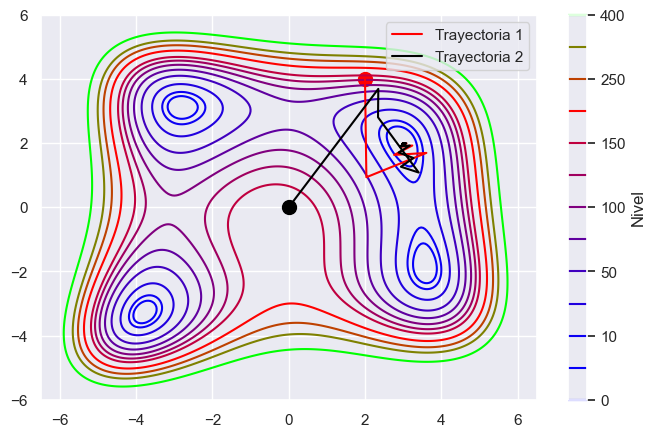

In [13]:
print('--------- x0 = (2., 4.) ---------')
x01 = np.array([2.,4.], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING2(f=f_Himmelblau,
                    gradf=grad_Himmelblau, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Himmelblau(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Himmelblau(xk1)))
print("INDICADORA: ", ind1)
print("PROMEDIOS")
print("alpha's:    ", hist1[:,2].mean())
print("ITER BACKT: ", hist1[:,3].mean())

print('\n--------- x0 = (0., 0.) ---------')
x02 = np.array([0.,0.], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING2(f=f_Himmelblau,
                    gradf=grad_Himmelblau, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Himmelblau(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Himmelblau(xk2)))
print("INDICADORA: ", ind2)
print("PROMEDIOS")
print("alpha's:    ", hist2[:,2].mean())
print("ITER BACKT: ", hist2[:,3].mean())

#Grafica
road1 = np.insert(hist1[:,0:2], 0, x01, axis=0)
road2 = np.insert(hist2[:,0:2], 0, x02, axis=0)
ax = contornosFnc2D(f_Himmelblau, xleft=-6.5, xright=6.5, ybottom=-6, ytop=6,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 400],
            secuencia1 = road1, secuencia2 = road2)
ax.scatter(2,4, s = 100, c = '#FF0000')
ax.scatter(0,0, s = 100, c = '#000000')
plt.legend()
plt.show()

### **Función de Beale con $\mathbf{x}_0 = (2.,3.)$ y $\mathbf{x}_0 = (2.,4.):$**

--------- x0 = (2., 3.) ---------
ITERACIONES: 572
xk:          [2.9999989  0.49999971]
f(xk):       2.0106616271904244e-13
||f(xk)||:   9.177893716362914e-07
INDICADORA:  True
PROMEDIOS
alpha's:     0.07237988685076045
ITER BACKT:  0.32867132867132864

--------- x0 = (2., 4.) ---------
ITERACIONES: 569
xk:          [2.99999915 0.49999977]
f(xk):       1.248326703757471e-13
||f(xk)||:   9.551240421727892e-07
INDICADORA:  True
PROMEDIOS
alpha's:     0.07424307796477013
ITER BACKT:  0.3339191564147627


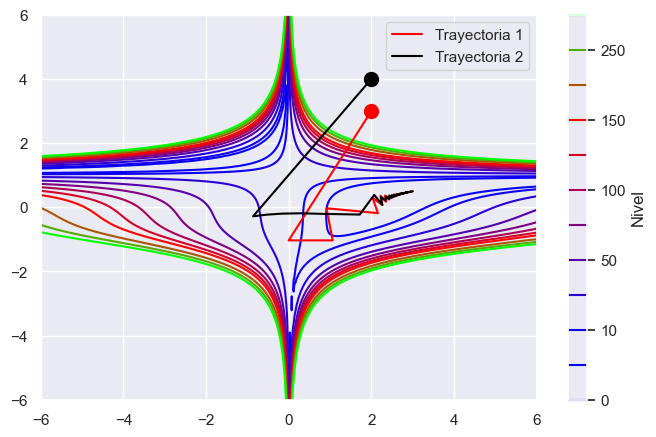

In [14]:
print('--------- x0 = (2., 3.) ---------')
x01 = np.array([2.,3.], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING2(f=f_Beale,
                    gradf=grad_Beale, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Beale(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Beale(xk1)))
print("INDICADORA: ", ind1)
print("PROMEDIOS")
print("alpha's:    ", hist1[:,2].mean())
print("ITER BACKT: ", hist1[:,3].mean())

print('\n--------- x0 = (2., 4.) ---------')
x02 = np.array([2.,4.], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING2(f=f_Beale,
                    gradf=grad_Beale, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Beale(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Beale(xk2)))
print("INDICADORA: ", ind2)
print("PROMEDIOS")
print("alpha's:    ", hist2[:,2].mean())
print("ITER BACKT: ", hist2[:,3].mean())

#Grafica
road1 = np.insert(hist1[:,0:2], 0, x01, axis=0)
road2 = np.insert(hist2[:,0:2], 0, x02, axis=0)
ax = contornosFnc2D(f_Beale, xleft=-6, xright=6, ybottom=-6, ytop=6,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1 = road1, secuencia2 = road2)
ax.scatter(2,3, s = 100, c = '#FF0000')
ax.scatter(2,4, s = 100, c = '#000000')
plt.legend()
plt.show()

### **Función de Rosenbrock con $\mathbf{x}_0 = (-2.1,4.5)$ y $\mathbf{x}_0 = (-1.2,1.0)$:**

--------- x0 = (-2.1, 4.5) ---------


ITERACIONES: 11126
xk:          [0.99999076 0.99998144]
f(xk):       8.601495795111204e-11
||f(xk)||:   1.9969310773251403e-05
INDICADORA:  True
PROMEDIOS
alpha's:     0.0026139750753402993
ITER BACKT:  0.01492000719036491

--------- x0 = (-1.2, 1.0) ---------
ITERACIONES: 7429
xk:          [0.99999061 0.99998122]
f(xk):       8.824055993589809e-11
||f(xk)||:   2.2614630993000547e-05
INDICADORA:  True
PROMEDIOS
alpha's:     0.003595007118009928
ITER BACKT:  0.02369094090725535


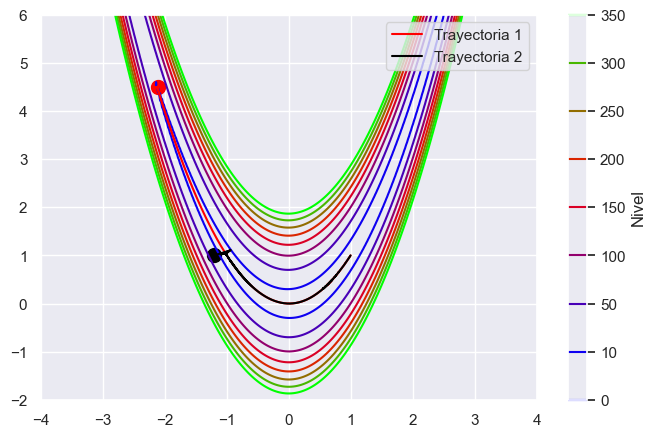

In [15]:
print('--------- x0 = (-2.1, 4.5) ---------')
x01 = np.array([-2.1, 4.5], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING2(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Rosenbrock(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk1)))
print("INDICADORA: ", ind1)
print("PROMEDIOS")
print("alpha's:    ", hist1[:,2].mean())
print("ITER BACKT: ", hist1[:,3].mean())

print('\n--------- x0 = (-1.2, 1.0) ---------')
x02 = np.array([-1.2, 1.0], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING2(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Rosenbrock(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk2)))
print("INDICADORA: ", ind2)
print("PROMEDIOS")
print("alpha's:    ", hist2[:,2].mean())
print("ITER BACKT: ", hist2[:,3].mean())

#Grafica
road1 = np.insert(hist1[:,0:2], 0, x01, axis=0)
road2 = np.insert(hist2[:,0:2], 0, x02, axis=0)
ax = contornosFnc2D(f_Rosenbrock, xleft=-4, xright=4, ybottom=-2, ytop=6,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = road1, secuencia2 = road2)
ax.scatter(-2.1, 4.5, s = 100, c = '#FF0000')
ax.scatter(-1.2, 1.0, s = 100, c = '#000000')
plt.legend()
plt.show()

### **Función de Rosenbrock con $\mathbf{x}_0 = (-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5)$ y** 

**$\mathbf{x}_0 = (-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0)$:**

In [16]:
tol = np.sqrt(10)*eps**(1/2)
print('--------- x0 = (-2.1, 4.5) ---------')
x01 = np.array([-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5], dtype = float)
xk1, k1, ind1, hist1 = DESC_MAX_BACKTRACKING2(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x01, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k1)
print("xk:         ", xk1)
print("f(xk):      ", f_Rosenbrock(xk1))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk1)))
print("INDICADORA: ", ind1)

print('\n--------- x0 = (-1.2, 1.0) ---------')
x02 = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0], dtype = float)
xk2, k2, ind2, hist2 = DESC_MAX_BACKTRACKING2(f=f_Rosenbrock,
                    gradf=grad_Rosenbrock, x0=x02, tol=tol,
                    max_iter=N, alpha_init=alpha_init,
                    p=rho, c=c1, Nb=Nb)

print("ITERACIONES:", k2)
print("xk:         ", xk2)
print("f(xk):      ", f_Rosenbrock(xk2))
print("||f(xk)||:  ", np.linalg.norm(grad_Rosenbrock(xk2)))
print("INDICADORA: ", ind2)

--------- x0 = (-2.1, 4.5) ---------
ITERACIONES: 10102
xk:          [0.9999999  0.99999977 0.99999958 0.99999912 0.99999828 0.9999965
 0.99999304 0.999986   0.99997196 0.99994377]
f(xk):       1.0513189634472898e-09
||f(xk)||:   8.339844502783495e-05
INDICADORA:  True

--------- x0 = (-1.2, 1.0) ---------
ITERACIONES: 10187
xk:          [0.9999999  0.99999977 0.99999958 0.9999991  0.99999826 0.99999646
 0.99999295 0.99998582 0.9999716  0.99994304]
f(xk):       1.0788739566892806e-09
||f(xk)||:   8.60947357488152e-05
INDICADORA:  True


## **2.3.**

Con base en el valor promedio de las iteraciones realizadas por el algoritmo de backtracking,
   el valor $k$ y las gráficas, escriba un comentario sobre si el cambio realizado ayuda
   al desempeño del método.
   ¿Hay alguna diferencia entre importante entre calcular el tamaño de paso
   de manera exacta con respecto a la búsqueda inexacta?

>**COMENTARIO:** Sí ayuda al desempeño del algoritmo, ya que, aunque en algunos casos el número de iteraciones del algotimo principal crece, la cantidad de iteraciones de backtracking se reduce considerablemente hasta el punto de que en algunos casos, el promedio de iteraciones de backtraking llega a ser menor que 1.

---

# **3.- Ejercicio 3:**

---

Sea $f(\mathbf{x}) = f(x_1, x_2) = 5 + x_1^2 + x_2^2$. Si $\mathbf{x}_0 = (-1,1)^\top$,
$\mathbf{p}_0 = (1,0)$ y $c_1=10^{-4}$.
Verifique de $\mathbf{p}_0$ es una dirección de descenso y encuentre el valor 
más grande $\alpha>0$ que satisface la condición de descenso suficiente:

$$ f(\mathbf{x}_0 + \alpha\mathbf{p}_0) \leq 
f(\mathbf{x}_0) + c_1 \alpha\mathbf{p}_0^\top\nabla f(\mathbf{p}_0). $$ 

>Para verificar que $\mathbf{p}_{0}$ es dirección de descenso, hay que verficar que $\nabla f(\mathbf{x})^{\top} \mathbf{p}_{0} < 0$.
>
>El gradiente de $f(\mathbf{x})$ es:
>$$
>\nabla f(\mathbf{x}) = \begin{pmatrix} 2x_1 \\ 2x_2 \end{pmatrix}
>$$
>
>El gradiente en $\mathbf{x}_0 = (-1, 1)^\top$ es:
>$$
>\nabla f(\mathbf{x}_0) = \begin{pmatrix} -2 \\ 2 \end{pmatrix}
>$$
>
>Entonces,
>$$
>\nabla f(\mathbf{x}_0)^\top \mathbf{p}_0 = \begin{pmatrix} -2 & 2 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = -2 < 0
>$$
>Como $\nabla f(\mathbf{x}_0)^\top \mathbf{p}_0 < 0$, $\mathbf{p}_0$ es una dirección de descenso.
>
>La condición de descenso suficiente es:
>$$
>f(\mathbf{x}_0 + \alpha\mathbf{p}_0) \leq f(\mathbf{x}_0) + c_1 \alpha\mathbf{p}_0^\top\nabla f(\mathbf{p}_0)
>$$
>
>Sustituyendo los valores conocidos:
>$$
>f((-1,1)^\top + \alpha(1,0)^\top) \leq f((-1,1)^\top) + c_{1} \alpha (1,0)^\top \begin{pmatrix} -2 \\ 2 \end{pmatrix}
>$$
>
>$$
>f((-1+\alpha, 1)^\top) \leq f((-1,1)^\top) - c_{1} \alpha (2)
>$$
>
>$$
>5 + (-1+\alpha)^2 + 1^2 \leq 5 + (-1)^2 + 1^2 - 2c_{1} \alpha
>$$
>
>$$
>1 - 2\alpha + \alpha^2 \leq 1 - 2c_{1} \alpha
>$$
>
>$$
>\alpha^2 - 2\alpha + 2c_{1}\alpha \leq 0
>$$
>
>$$
>\alpha (\alpha - 2 + 2c_{1}) \leq 0
>$$
>
>La solución para esta desigualdad está dada en $0 \leq \alpha \leq 2(1-c_{1})$. Entonces, el valor más grande de $\alpha$ que satisface la condición de descenso suficiente es $\alpha = 2(1-c_{1}) \approx 1.9998$.

---

# **4.- Ejercicio 4:**

---

Sea $f:\mathbb{R}^n \rightarrow \mathbb{R}$ y $\mathbf{S}$ una matriz no singular de tamaño $n \times n$. 
Si $\mathbf{x} = \mathbf{S}\mathbf{y}$ para $\mathbf{y} \in \mathbb{R}^n$ y definimos
$g(\mathbf{y}) = f(\mathbf{S}\mathbf{y})$, aplicando la regla de la cadena muestre que 

$$ \nabla g(\mathbf{y}) =  \mathbf{S}^\top \nabla f(\mathbf{x}). $$

Entonces aplicando el método de máximo descenso a la función $g$ es 

$$ \mathbf{y}_{k+1} = \mathbf{y}_k - \alpha_k \mathbf{S}^\top \nabla f(\mathbf{S}\mathbf{y}_k).$$

Multiplicando por $\mathbf{S}$ ambos miembros de la ecuación y usando la notación
$\mathbf{x}_k =\mathbf{S} \mathbf{y}_k$:

$$ \mathbf{x}_{k+1} =  \mathbf{S} \mathbf{y}_{k+1} = 
\mathbf{S} \mathbf{y}_k - \alpha_k \mathbf{S}\mathbf{S}^\top \nabla f(\mathbf{S}\mathbf{y}_k)
= \mathbf{x}_k - \alpha_k \mathbf{S}\mathbf{S}^\top \nabla f(\mathbf{x}_k).$$

Si $\mathbf{D} = \mathbf{S}\mathbf{S}^\top$, obtenemos el método de *gradiente escalado*:

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k \mathbf{D} \nabla f(\mathbf{x}_k).$$

Muestre que $-\mathbf{D} \nabla f(\mathbf{x}_k)$ es una dirección de descenso.

>Como $\mathbf{x} = \mathbf{Sy}$, entonces:
>$$x_{i} = (\mathbf{Sy})_{i} = \sum_{j=1}^{n} (S)_{ij}y_{j}$$
>$$\frac{\partial x_{i}}{\partial y_{j}} = \frac{\partial}{\partial y_{j}} \left( \sum_{k=1}^{n} (S)_{ik}y_{k} \right) = (S)_{ij}$$
>Entonces, por la regla de la cadena:
>\begin{align*}
>\nabla g(\mathbf{y})_{j} &= \frac{\partial}{\partial y_{j}} \left( f(\mathbf{Sy}) \right) = \frac{\partial}{\partial y_{j}} \left( f(\mathbf{x}(\mathbf{y})) \right) = \sum_{i=1}^{n} \frac{\partial f}{\partial x_{i}} \frac{\partial x_{i}}{\partial y_{j}}\\
>&= \sum_{i=1}^{n} \frac{\partial f}{\partial x_{i}} (S)_{ij} = \sum_{i=1}^{n} (S^\top)_{ji} \frac{\partial f}{\partial x_{i}}
>=\left( \mathbf{S}^\top \nabla f(\mathbf{x}) \right)_{j}
>\end{align*}
>Por lo tanto:
>$$ \nabla g(\mathbf{y}) =  \mathbf{S}^\top \nabla f(\mathbf{x}). $$
>
>Para verificar que $-\mathbf{D} \nabla f(\mathbf{x}_k)$ es una dirección de descenso, hay que verficar que $\nabla f(\mathbf{x}_k)^{\top} \cdot (-\mathbf{D} \nabla f(\mathbf{x}_k)) < 0$. Recordemos que $\mathbf{D} = \mathbf{S}\mathbf{S}^\top$ y este producto siempre define una matriz simétrica y definida positiva en $\mathbb{R}^{n\times n}$. Además, una matriz $A$ es definida positiva si, y sólo si, $\forall$ $\mathbf{x}\in\mathbb{R}^{n} - \{0\}$, se tiene que $\mathbf{x}^\top A \mathbf{x} > 0$. Por esta razón, si $\nabla f(\mathbf{x}_k) \neq 0$, entonces $\nabla f(\mathbf{x}_k)^{\top} \cdot \mathbf{D} \cdot \nabla f(\mathbf{x}_k) > 0$, es decir, 
>$$-\nabla f(\mathbf{x}_k)^{\top} \cdot \mathbf{D} \cdot \nabla f(\mathbf{x}_k) < 0$$
>
>Por lo tanto, $-\mathbf{D} \nabla f(\mathbf{x}_k)$ es una dirección de descenso.